# **Unemployment Analysis**

This project delves into the intricate landscape of unemployment in India, employing a data-driven approach to unravel insights and patterns. The analysis utilizes two datasets - one providing an overview of unemployment and the other offering a detailed breakdown up to November 2020. The project unfolds in several key tasks, each contributing to a comprehensive understanding of the unemployment scenario in the country.

**1: Importing Libraries and Loading Data**

 In this task, you import necessary libraries such as NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn, and Plotly Express. Then, you load two datasets (df and df2) containing information about unemployment in India.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import calendar

In [7]:
df = pd.read_csv("Unemployment in India.csv")


**2: Exploratory Data Analysis (EDA) with Pandas and Seaborn**

Here, You will perform initial exploration of the data. You check a sample of 5 rows, identify missing values, check for duplicates, and visualize the distribution of data using pie charts, bar charts, and a pair plot with Seaborn.

In [8]:
df.sample(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
381,Andhra Pradesh,31-01-2020,Monthly,7.11,4618860.0,35.91,Urban
584,Maharashtra,29-02-2020,Monthly,5.34,17122782.0,37.61,Urban
502,Himachal Pradesh,31-12-2019,Monthly,25.32,241366.0,52.55,Urban
682,Tamil Nadu,31-05-2020,Monthly,25.95,5733921.0,23.77,Urban
331,Uttar Pradesh,30-06-2020,Monthly,8.51,41908909.0,36.89,Rural


In [9]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763     True
764     True
765     True
766     True
767     True
Length: 768, dtype: bool

In [11]:
df.shape

(768, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [13]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [14]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

<Axes: ylabel='count'>

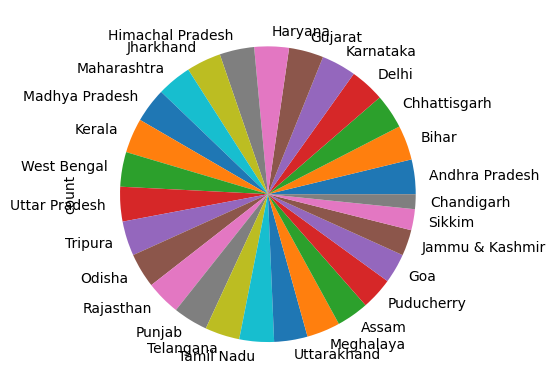

In [15]:
df['Region'].value_counts().plot.pie()

<Axes: xlabel='Area'>

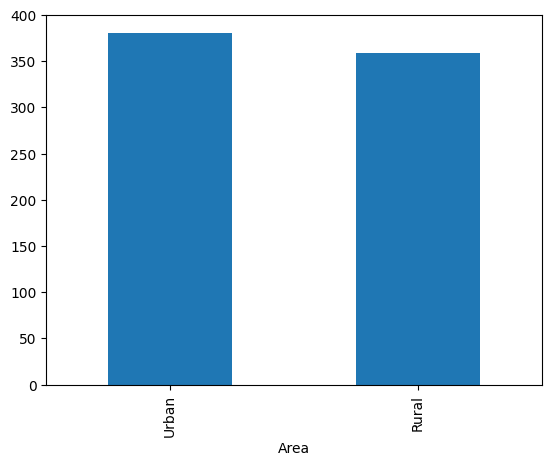

In [16]:
df['Area'].value_counts().plot.bar()

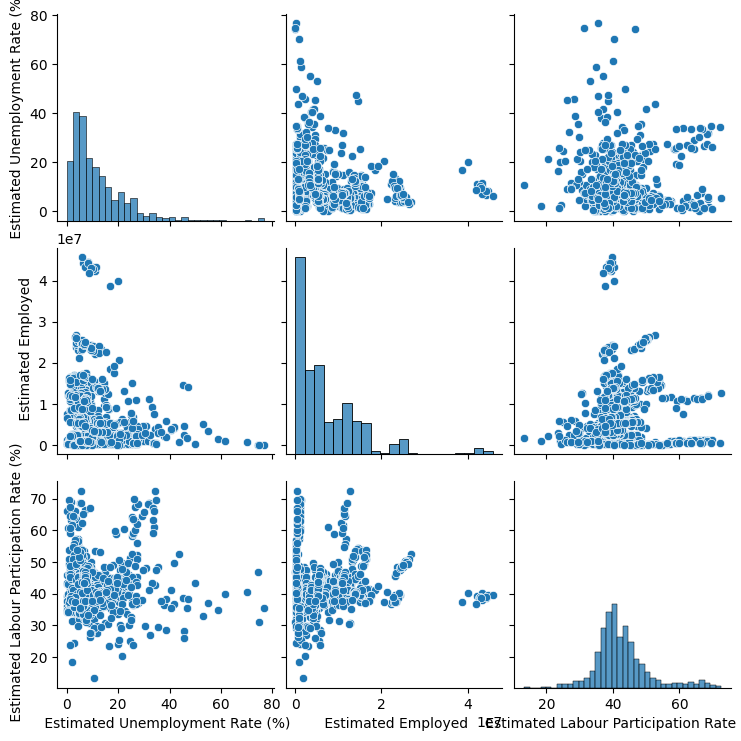

In [17]:
sns.pairplot(df)

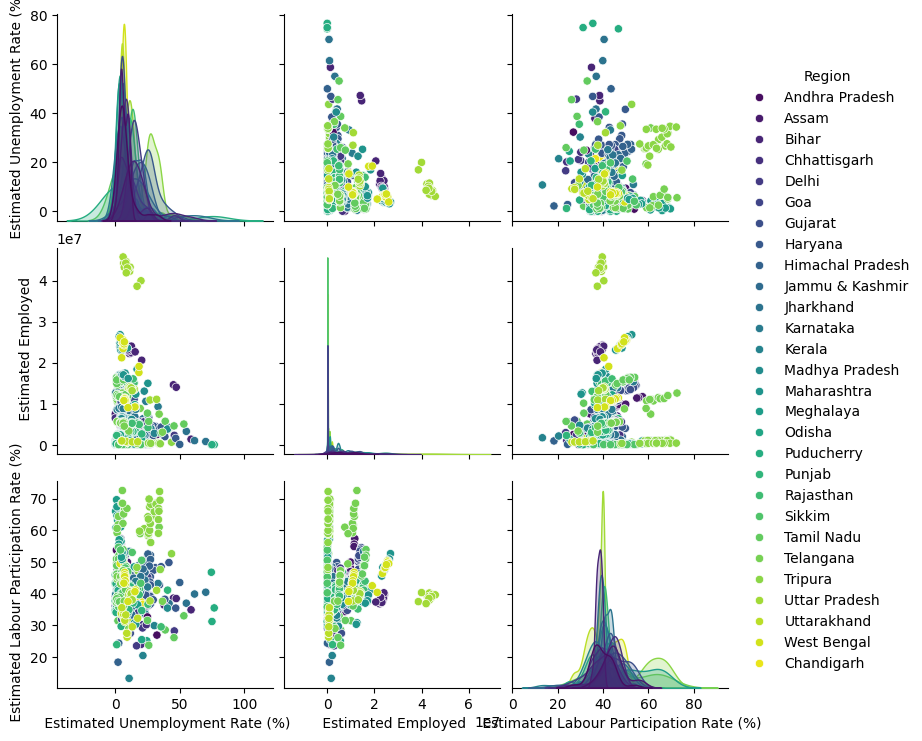

In [18]:
sns.pairplot(df, hue='Region', palette='viridis')

**3: Histograms of Estimated Employment and Unemployment Rates**

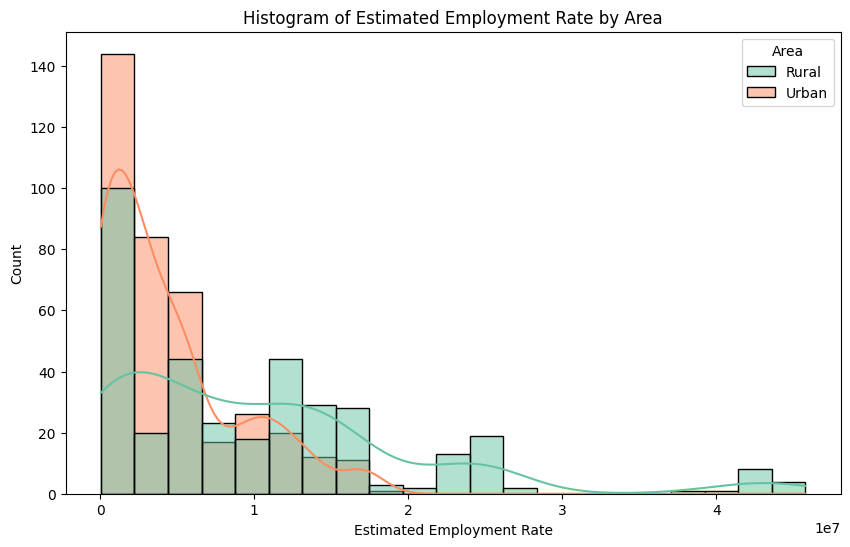

In [19]:
# Histogram of Estimated Employment Rate by Area

plt.style.use("default")

df.columns = ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area']
plt.figure(figsize=(10, 6))
sns.histplot(x=' Estimated Employed', hue="Area", data=df, kde=True, palette="Set2")
plt.title("Histogram of Estimated Employment Rate by Area")
plt.xlabel("Estimated Employment Rate")
plt.ylabel("Count")
plt.show()

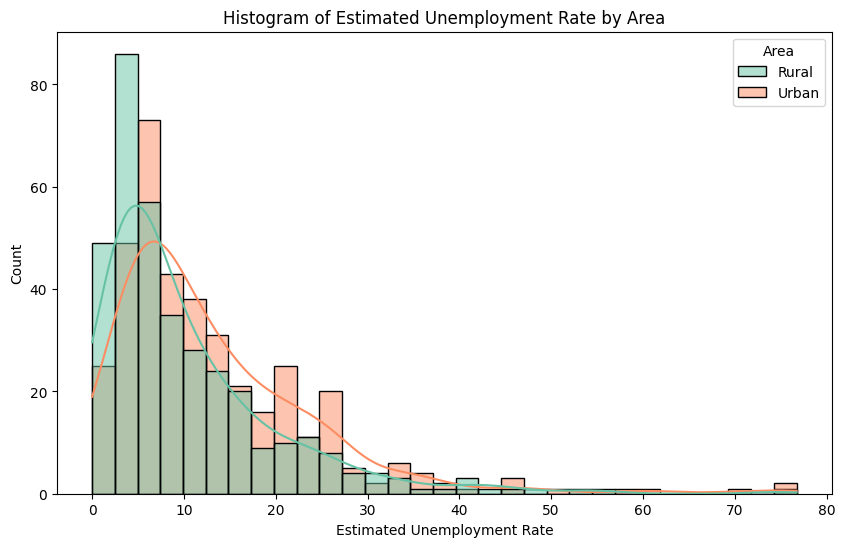

In [20]:
# Histogram of Estimated Unemployment Rate by Area

plt.style.use("default")

df.columns = ['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area']
plt.figure(figsize=(10, 6))
sns.histplot(x=' Estimated Unemployment Rate (%)', hue="Area", data=df, kde=True, palette="Set2")
plt.title("Histogram of Estimated Unemployment Rate by Area")
plt.xlabel("Estimated Unemployment Rate")
plt.ylabel("Count")
plt.show()

**4: Distribution of Estimated Unemployment Rate by Region**

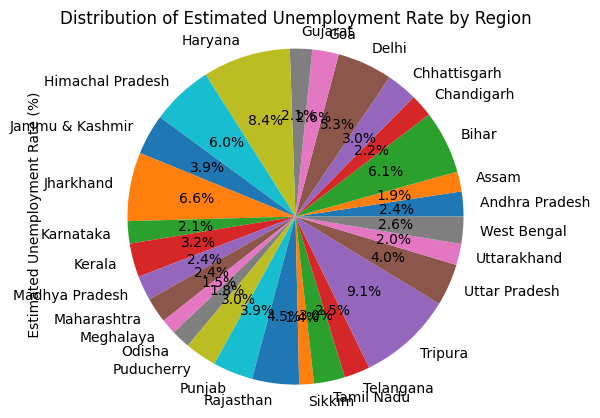

In [21]:
# Distribution of Estimated UnEmployement Rate by Region

data = df[['Region', ' Estimated Unemployment Rate (%)']]
data_grouped = df.groupby('Region')[' Estimated Unemployment Rate (%)'].sum()
data_grouped.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Estimated Unemployment Rate by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
